In [266]:
# Import modules 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style = "whitegrid")
pd.set_option("display.float_format","{:,.0f}".format)

In [268]:
#Load the UN_tourism_caribbean_countries_cleaned dataset
df = pd.read_csv("UN_tourism_caribbean_countries_cleaned.csv")
#Visualize the first five lines
df.head()

,type_of_visitors,country_receiving,where_tourist_from,year,number_of_tourist,unit
0,excursionists,Antigua and Barbuda,World,1995,227,thousand trips
1,excursionists,Antigua and Barbuda,World,1996,270,thousand trips
2,excursionists,Antigua and Barbuda,World,1997,286,thousand trips
3,excursionists,Antigua and Barbuda,World,1998,336,thousand trips
4,excursionists,Antigua and Barbuda,World,1999,328,thousand trips


In [324]:
# Convert the column number_of_tourist by multiplying it by 1000
df["number_of_tourist"] =df["number_of_tourist"] * 1000

In [326]:
# Drop the column unit
df =df.drop(columns=["unit"])

In [328]:
len(df["year"].unique())

30

In [398]:
# Remove rows where year is 2023 or 2024 and reset index 
df = df[~df["year"].isin([2023, 2024])]
df = df.reset_index(drop=True)

In [414]:
df_2022 = df[df["year"] == 2022]
df_2022.head()

,type_of_visitors,country_receiving,where_tourist_from,year,number_of_tourist
27,excursionists,Antigua and Barbuda,World,2022,"377,300"
55,excursionists,Bahamas,World,2022,"5,390,000"
83,excursionists,Barbados,World,2022,"357,900"
111,excursionists,Bermuda,World,2022,"402,700"
139,excursionists,Belize,World,2022,"615,000"


In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3005 entries, 0 to 3004
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   type_of_visitors    3005 non-null   object 
 1   country_receiving   3005 non-null   object 
 2   where_tourist_from  3005 non-null   object 
 3   year                3005 non-null   int64  
 4   number_of_tourist   3005 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 117.5+ KB


In [418]:
df["number_of_tourist"].describe()

count       3,005
mean      811,147
std     1,099,627
min           100
25%       169,400
50%       424,000
75%       972,000
max     8,488,856
Name: number_of_tourist, dtype: float64

In [420]:
df.sample(5)

,type_of_visitors,country_receiving,where_tourist_from,year,number_of_tourist
1555,excursionists,Barbados,World,2006,"539,000"
174,excursionists,Cayman Islands,World,2001,"1,215,000"
70,excursionists,Barbados,World,2009,"635,000"
1713,excursionists,Dominica,World,2009,"533,000"
1506,tourists,St. Eustatius,World,2001,"9,700"


In [422]:
# Filter only total_visitors
df_total = df[df["type_of_visitors"] == "total_visitors"]

# Keep only rows where tourists come from "World"
df_world = df_total[df_total["where_tourist_from"] == "World"]

# Filter only year 2022
df_2022 = df_world[df_world["year"] == 2022]

# Top 10 countries based on number_of_tourist
top10_2022 = (
    df_2022.groupby("country_receiving")["number_of_tourist"]
    .max()   # in case there is more than one "World" entry
    .sort_values(ascending=False)
    .head(10)
)

print(top10_2022)

country_receiving
Dominican Republic          8,488,856
Bahamas                     7,000,700
Puerto Rico                 3,637,500
Jamaica                     3,330,700
Aruba                       1,711,000
Cuba                        1,614,100
Sint Maarten (Dutch part)   1,217,000
Curaçao                     1,034,200
Cayman Islands              1,027,700
Barbados                      897,600
Name: number_of_tourist, dtype: float64


In [424]:
# Filter only total_visitors
df_total = df[df["type_of_visitors"] == "total_visitors"]

# Filter only where tourists come from World
df_world = df_total[df_total["where_tourist_from"] == "World"]

# Filter only year 2022
df_2022 = df_world[df_world["year"] == 2022]

# Top 10 countries that received the least tourists in 2022
bottom10_2022 = (
    df_2022.groupby("country_receiving")["number_of_tourist"]
    .min()   # In case multiple "World" lines exist
    .sort_values(ascending=True)
    .head(10)
)

print(bottom10_2022)

country_receiving
Anguilla                            95,800
Saint Vincent and the Grenadines   210,000
Dominica                           235,000
Trinidad and Tobago                253,300
Antigua and Barbuda                300,100
Grenada                            335,000
Bermuda                            548,500
Saint Kitts and Nevis              589,100
Martinique                         661,000
Saint Lucia                        714,000
Name: number_of_tourist, dtype: float64


<Axes: >

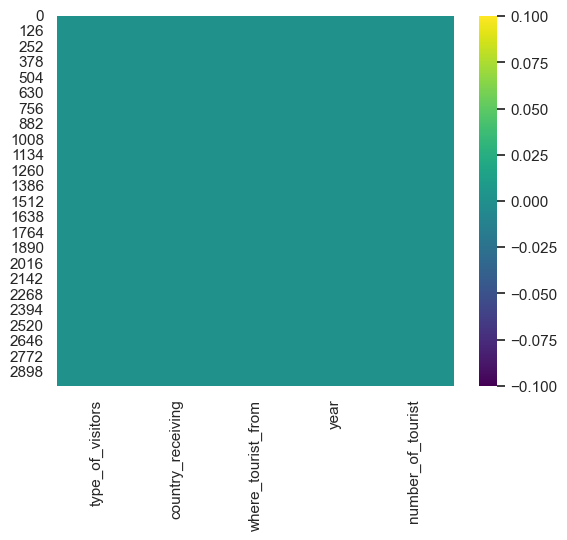

In [426]:
df.isnull().sum()
sns.heatmap(df.isnull(),cmap ="viridis")

In [430]:
df.groupby("country_receiving")["number_of_tourist"].describe().sort_values("mean",ascending=False)

,count,mean,std,min,25%,50%,75%,max
country_receiving,,,,,,,,
Bahamas,112,"3,235,494","1,662,366","441,000","1,616,750","3,079,000","4,630,750","7,250,000"
Puerto Rico,110,"2,579,422","1,438,361","364,400","1,240,150","2,686,050","3,720,500","5,213,000"
Dominican Republic,112,"2,383,510","2,263,102","30,000","377,000","1,550,721","4,025,250","8,488,856"
Jamaica,112,"1,651,411","897,171","71,000","1,092,000","1,419,500","2,029,750","4,319,000"
United States Virgin Islands,108,"1,532,969","739,167","245,700","618,000","1,762,500","2,011,500","2,814,000"
Cuba,100,"1,297,074","1,410,596","1,000","23,750","1,044,500","2,274,750","4,712,000"
Cayman Islands,109,"1,204,827","652,693","17,300","503,000","1,385,000","1,728,000","2,384,000"
Sint Maarten (Dutch part),112,"1,118,955","610,708","106,000","475,000","1,172,000","1,634,000","2,502,000"
Aruba,112,"805,619","412,378","136,000","570,000","675,000","1,001,875","1,951,000"


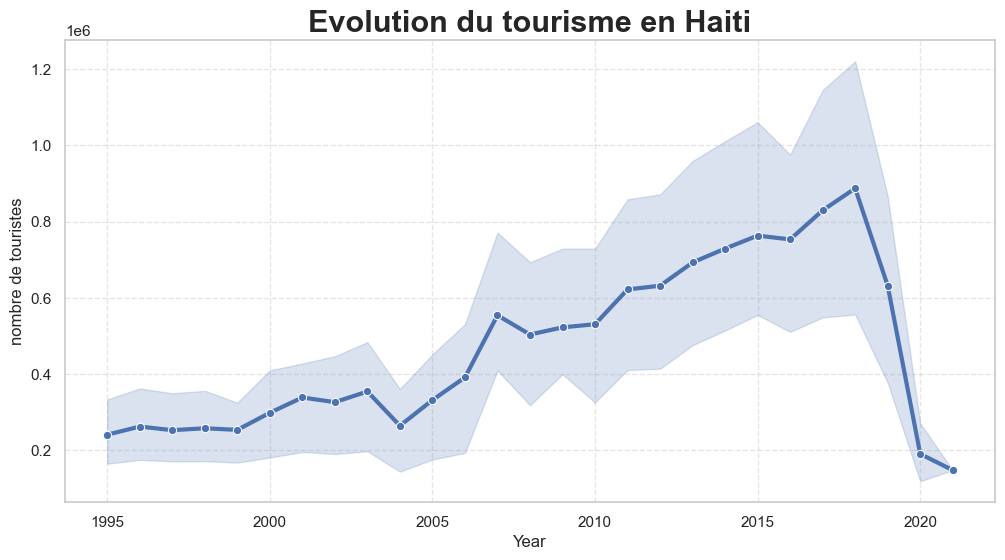

In [436]:
country = "Haiti"
df_country = df[df["country_receiving"]==country]
plt.figure(figsize=(12,6))
sns.lineplot(data=df_country,x="year", y = "number_of_tourist", linewidth =3, marker="o")
plt.grid(True,linestyle="--", alpha = 0.5)
plt.title(f"Evolution du tourisme en {country}",fontsize = 22, fontweight ="bold")
plt.ylabel("nombre de touristes")
plt.xlabel("Year")
plt.show()

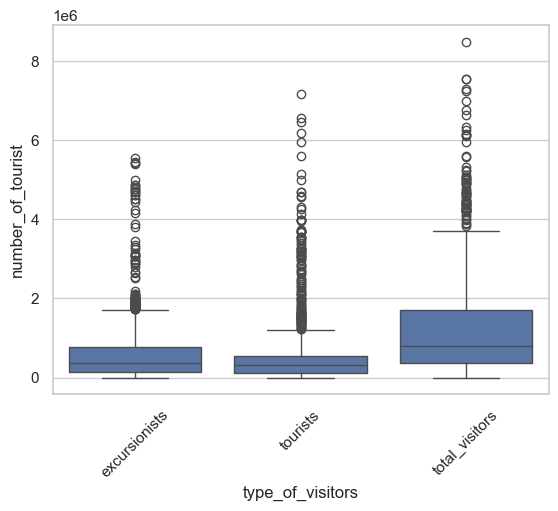

In [440]:
sns.boxplot(data=df, x ="type_of_visitors", y="number_of_tourist")
plt.xticks(rotation=45)
plt.show()